In [35]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Load the CSV
df = pd.read_csv('../data/raw/FRONTUR/num_tourists_CCAA.csv', sep=';', encoding='latin1')
df.describe(include='all')

,Tipo de dato,Comunidades autónomas,Periodo,Total
count,464,464,464,464
unique,1,8,58,464
top,Dato base,Total,2025M06,9.476.248
freq,464,58,8,1


# Data from Source

In [37]:
# Basic cleaning
df = df.drop(columns=['Tipo de dato'])

# Convert the 'Periodo' column to datetime type
df['Period'] = pd.to_datetime(df['Periodo'], format='%YM%m')
df = df.drop(columns=['Periodo'])

# Convert the 'Total' column to numeric type
df['Total'] = df['Total'].str.replace('.', '').astype(float)

df

,Comunidades autónomas,Total,Period
0,Total,9476248.0,2025-06-01
1,Total,9395612.0,2025-05-01
2,Total,8568142.0,2025-04-01
3,Total,6593604.0,2025-03-01
4,Total,5397279.0,2025-02-01
...,...,...,...
459,Otras Comunidades Autónomas,105428.0,2021-01-01
460,Otras Comunidades Autónomas,141951.0,2020-12-01
461,Otras Comunidades Autónomas,68811.0,2020-11-01
462,Otras Comunidades Autónomas,208085.0,2020-10-01


In [38]:
df = df.set_index("Period")
df = df.rename(columns={'Comunidades autónomas': 'CCAA'})

df.head()

,CCAA,Total
Period,,
2025-06-01,Total,9476248.0
2025-05-01,Total,9395612.0
2025-04-01,Total,8568142.0
2025-03-01,Total,6593604.0
2025-02-01,Total,5397279.0


# Data visualization

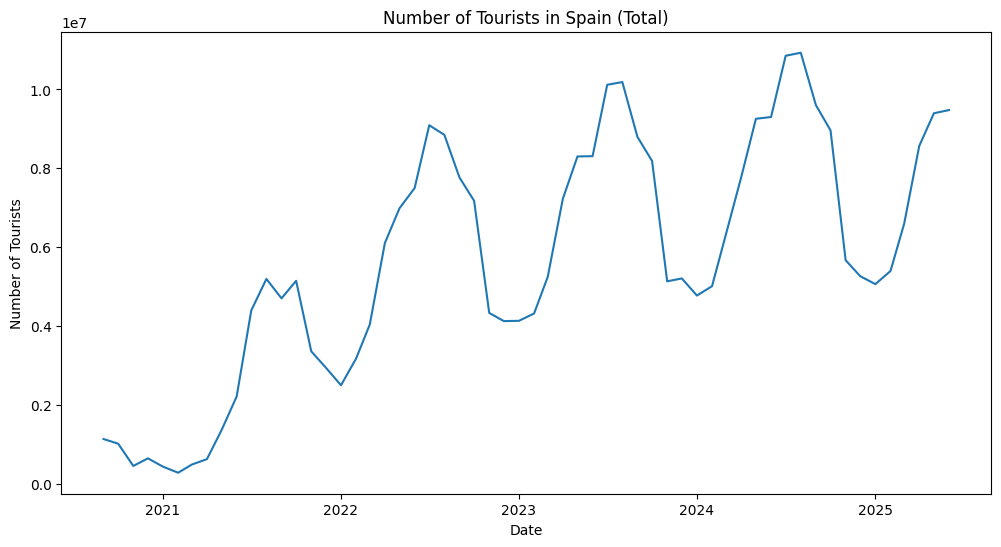

In [39]:
# Data visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[df['CCAA']=='Total'], x='Period', y='Total')
plt.title('Number of Tourists in Spain (Total)')
plt.xlabel('Date')
plt.ylabel('Number of Tourists')
plt.show()

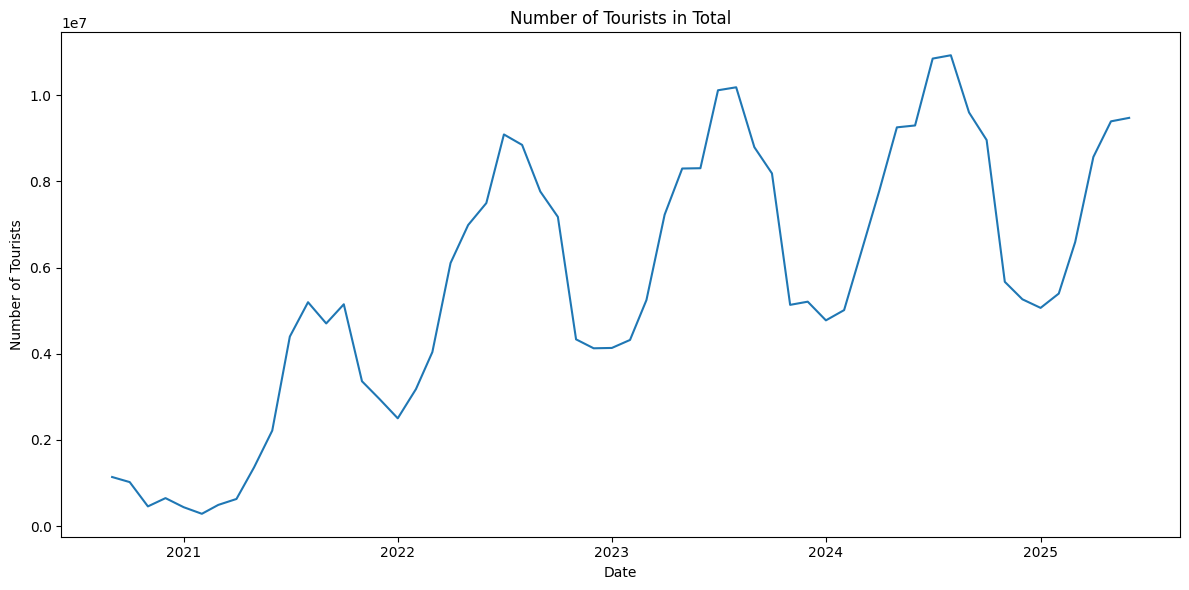

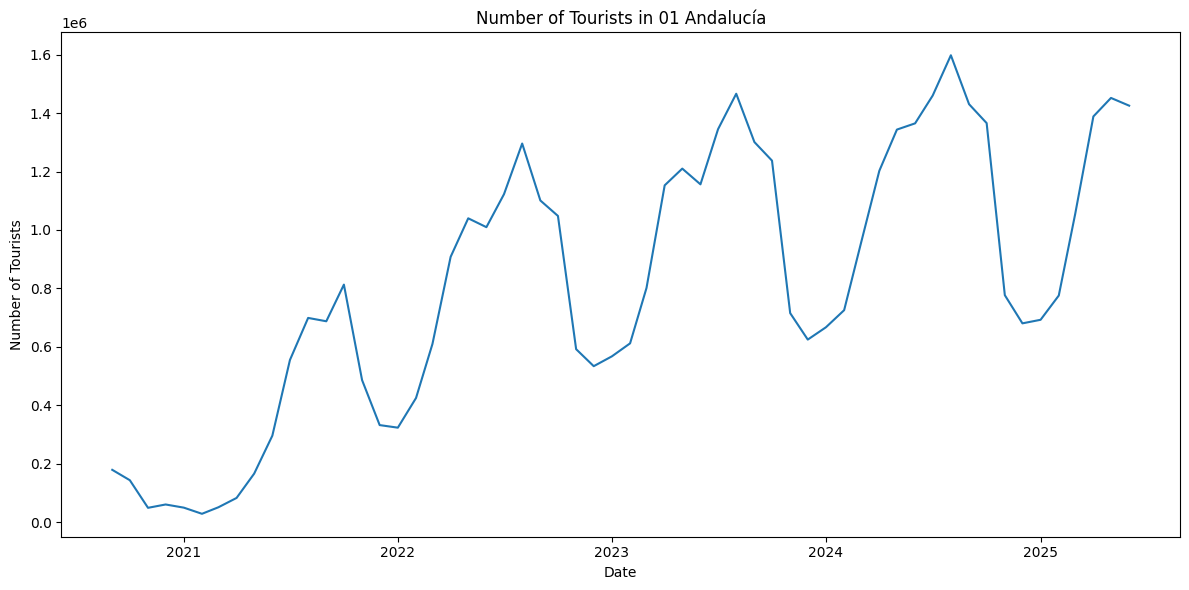

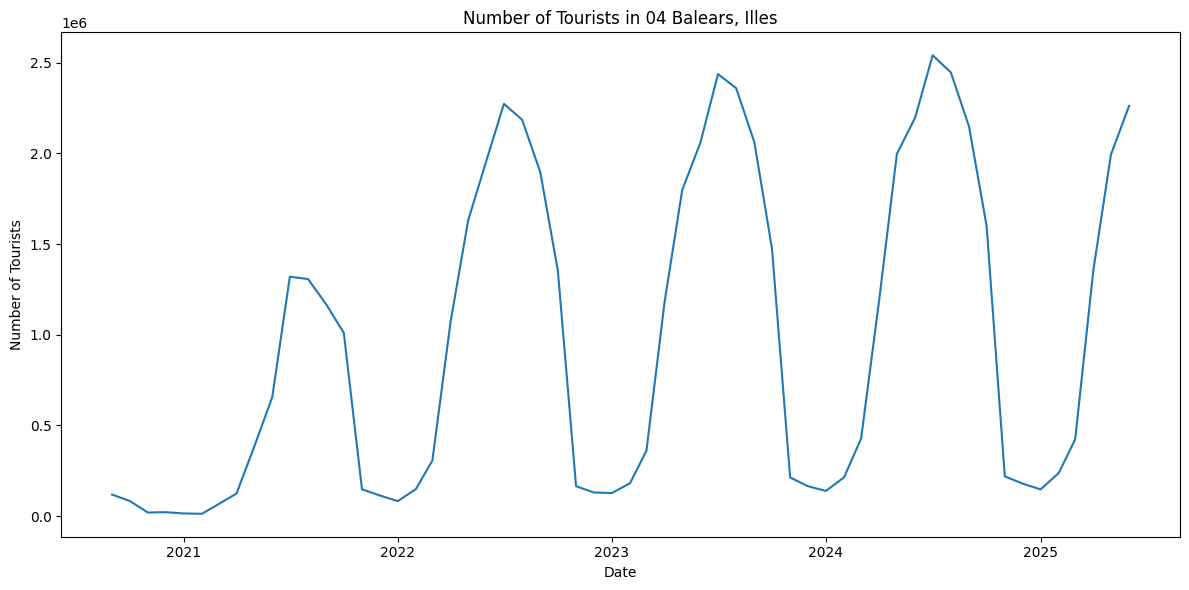

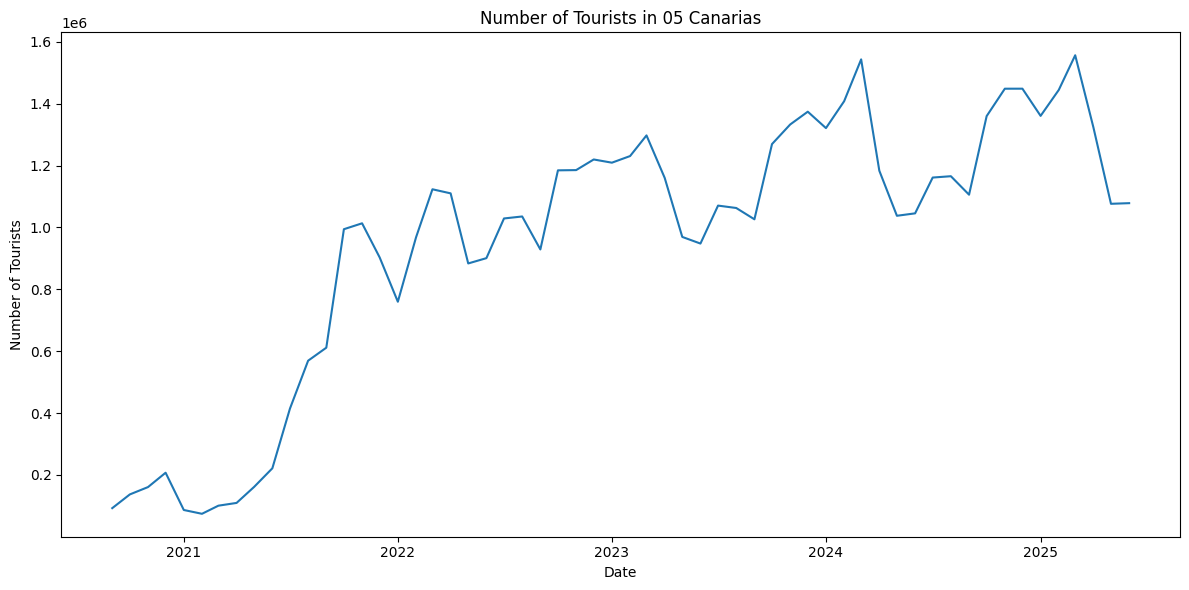

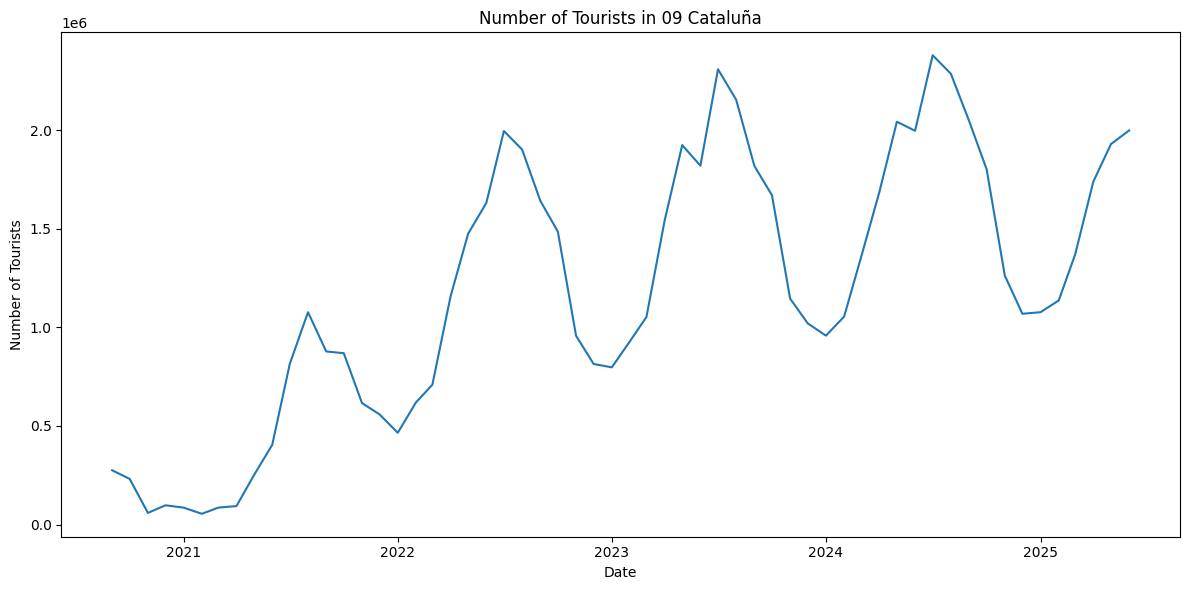

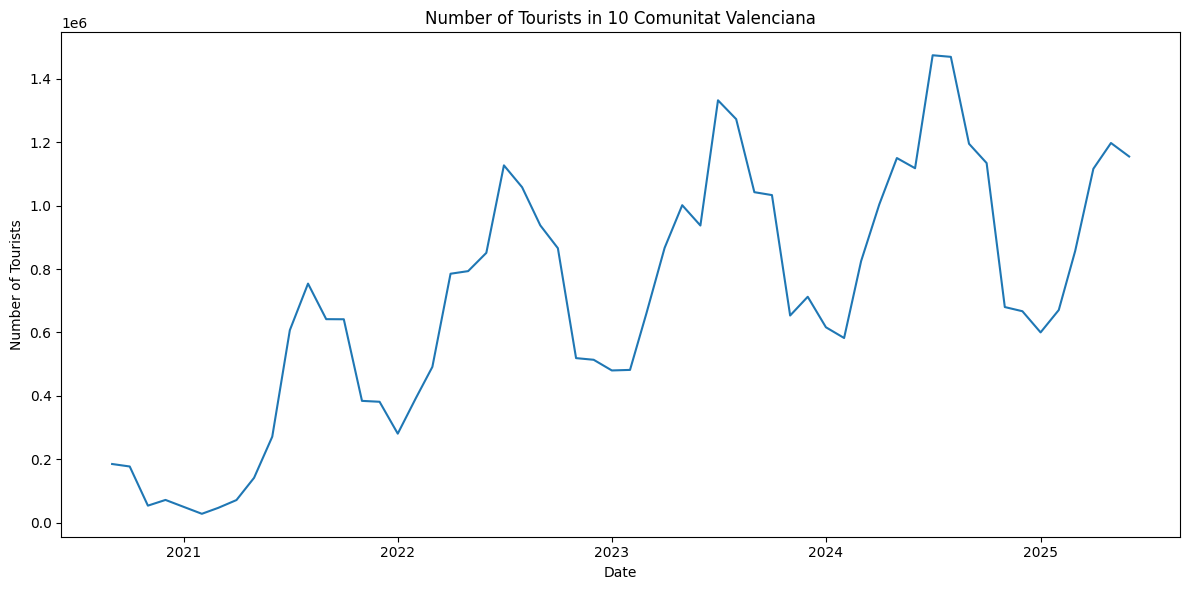

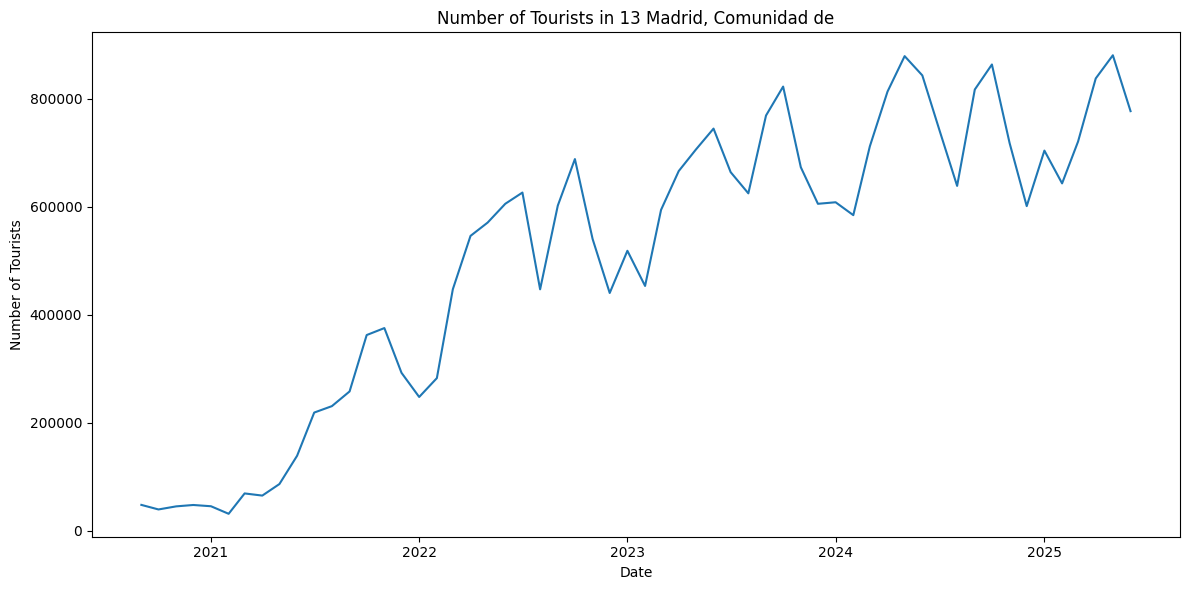

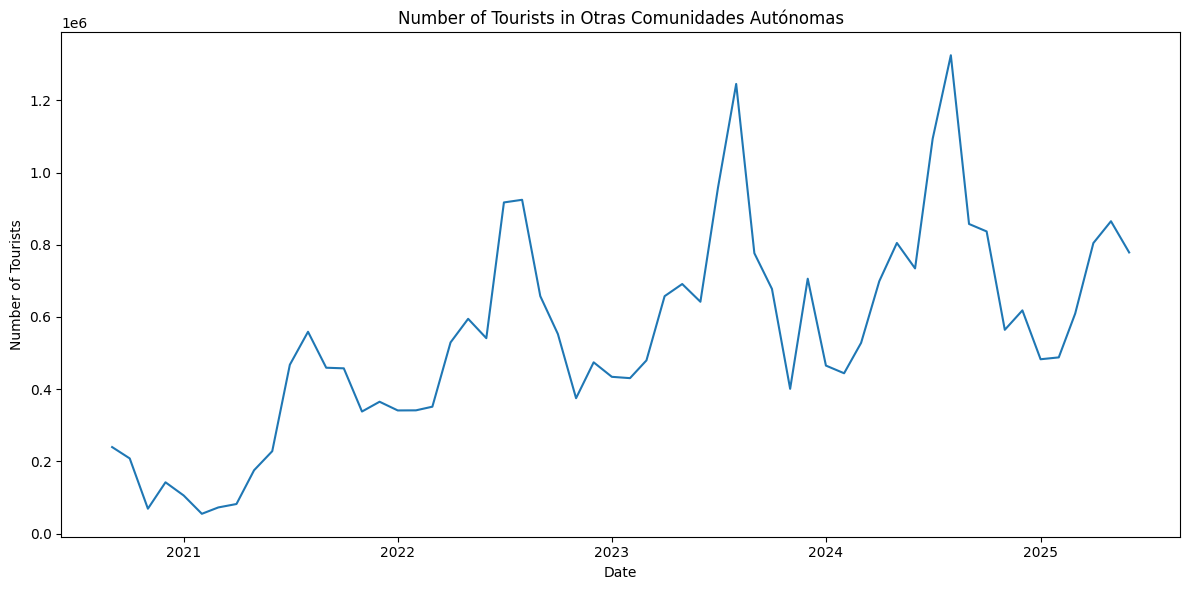

In [40]:
# Plot for each Comunidad Autónoma separately
for comunidad in df['CCAA'].unique():
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=df[df['CCAA'] == comunidad],
        x=df[df['CCAA'] == comunidad].index,
        y='Total'
    )
    plt.title(f'Number of Tourists in {comunidad}')
    plt.xlabel('Date')
    plt.ylabel('Number of Tourists')
    plt.tight_layout()
    plt.show()

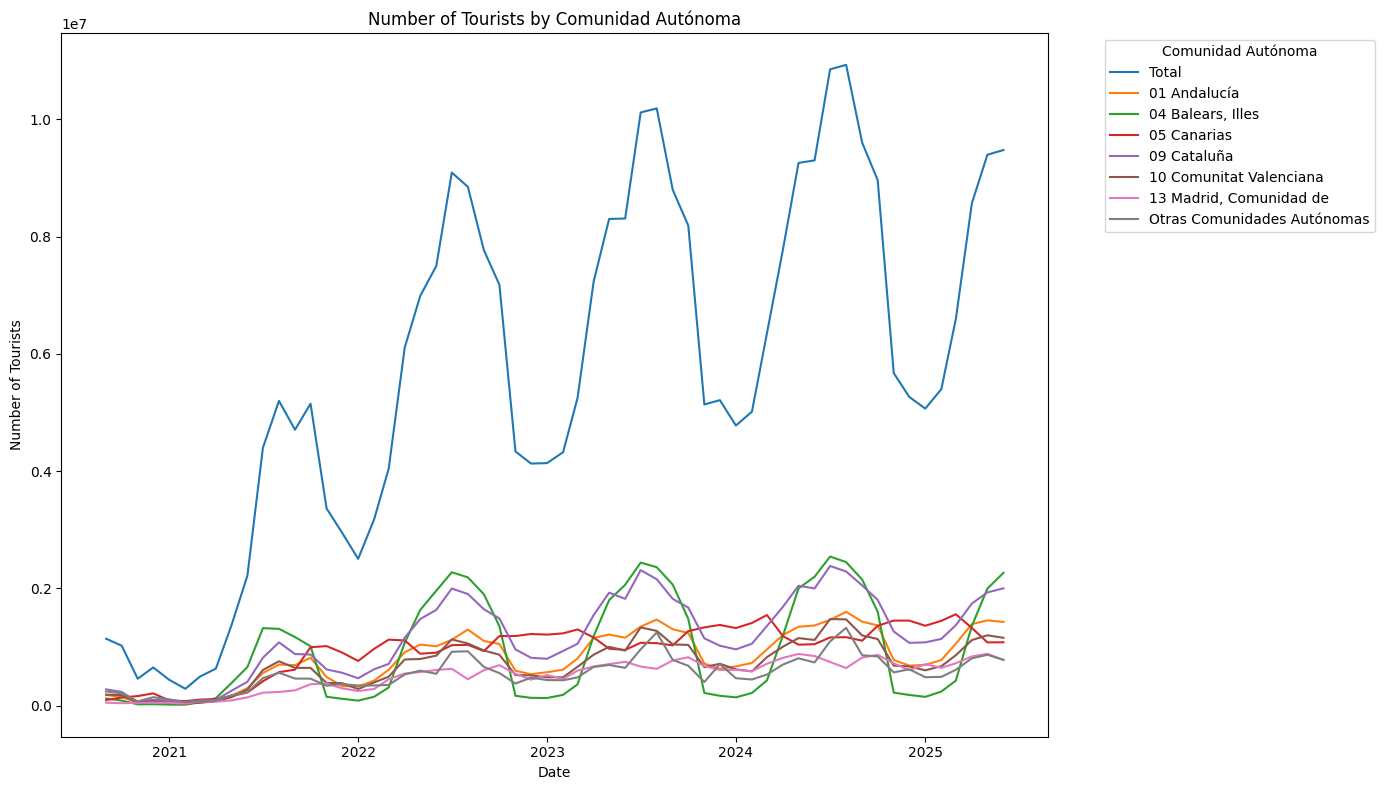

In [ ]:
# Plot for all CCAA together
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=df,
    x=df.index,
    y='Total',
    hue='CCAA',
    palette='tab10'
)
plt.title('Number of Tourists by CCAA')
plt.xlabel('Date')
plt.ylabel('Number of Tourists')
plt.legend(title='CCAA', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [41]:
# Sort the DataFrame by date
df = df.sort_index()

# Save the cleaned DataFrame
df.to_csv('../data/processed/num_tourists.csv', index=True, sep=';')

# Final Report